# FINAL PROJECT Big Data Analytics

### Desy Puspitasari

Buatlah analisis terhadap dataset yang Anda dapatkan dari internet.
Keterangan: File dataset bisa dicari di Kaggle.com atau di UCI Machine Learning

Prosedur analisis yang dilakukan adalah sbb:
1. Berdasarkan dataset yang dipilih, buatlah Scatter Plot untuk masing-masing features [Score: 15]
2. Berdasarkan pola data dari scatter plot (No. 1), pilih 2 features yang memiliki dugaan kuat ada korelasi. Narasikan alasannya! [Score: 10]
3. Buatlah statistik deskriptif dari beberapa 2 features yang dipilih. Berikan narasi terhadap statistik tersebut [Score: 20]
4. Dari 2 features yang dipilih tersebut (No. 3), buatlah analisis model regresi (linear atau nonlinear). Jenis model regresi yang dipilih harus menyesuaikan pola sebaran data dari scatter plot. Model yang telah dibuat harus ditunjukkan secara visual dg grafik, serta tunjukkan tingkat keakuratannya (bisa menggunakan sembarang metrik) [Score: 25]

Terhadap dataset yang diperoleh, lakukan pula analisis berikutnya (pilih salah satu): [Score: 30]
- Association (lihat contoh)
- Clustering (lihat contoh)
- Classification (lihat contoh)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://mysecondproject.s3.amazonaws.com/forestfires.csv') # Membuka data
display(data.head())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


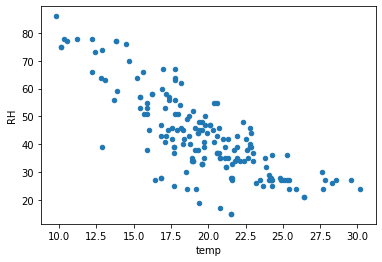

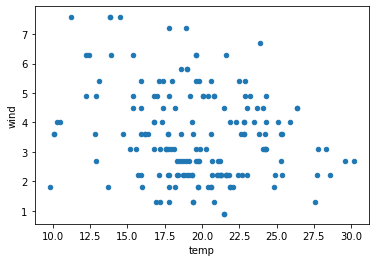

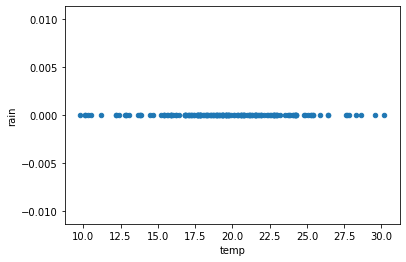

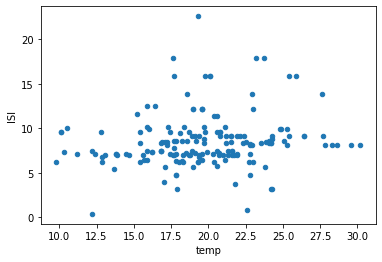

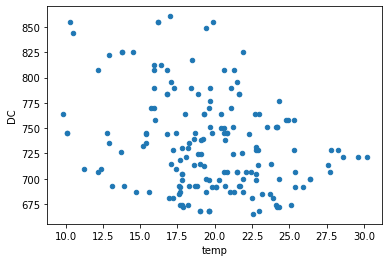

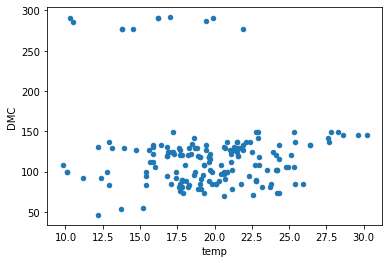

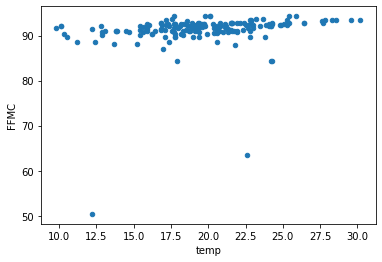

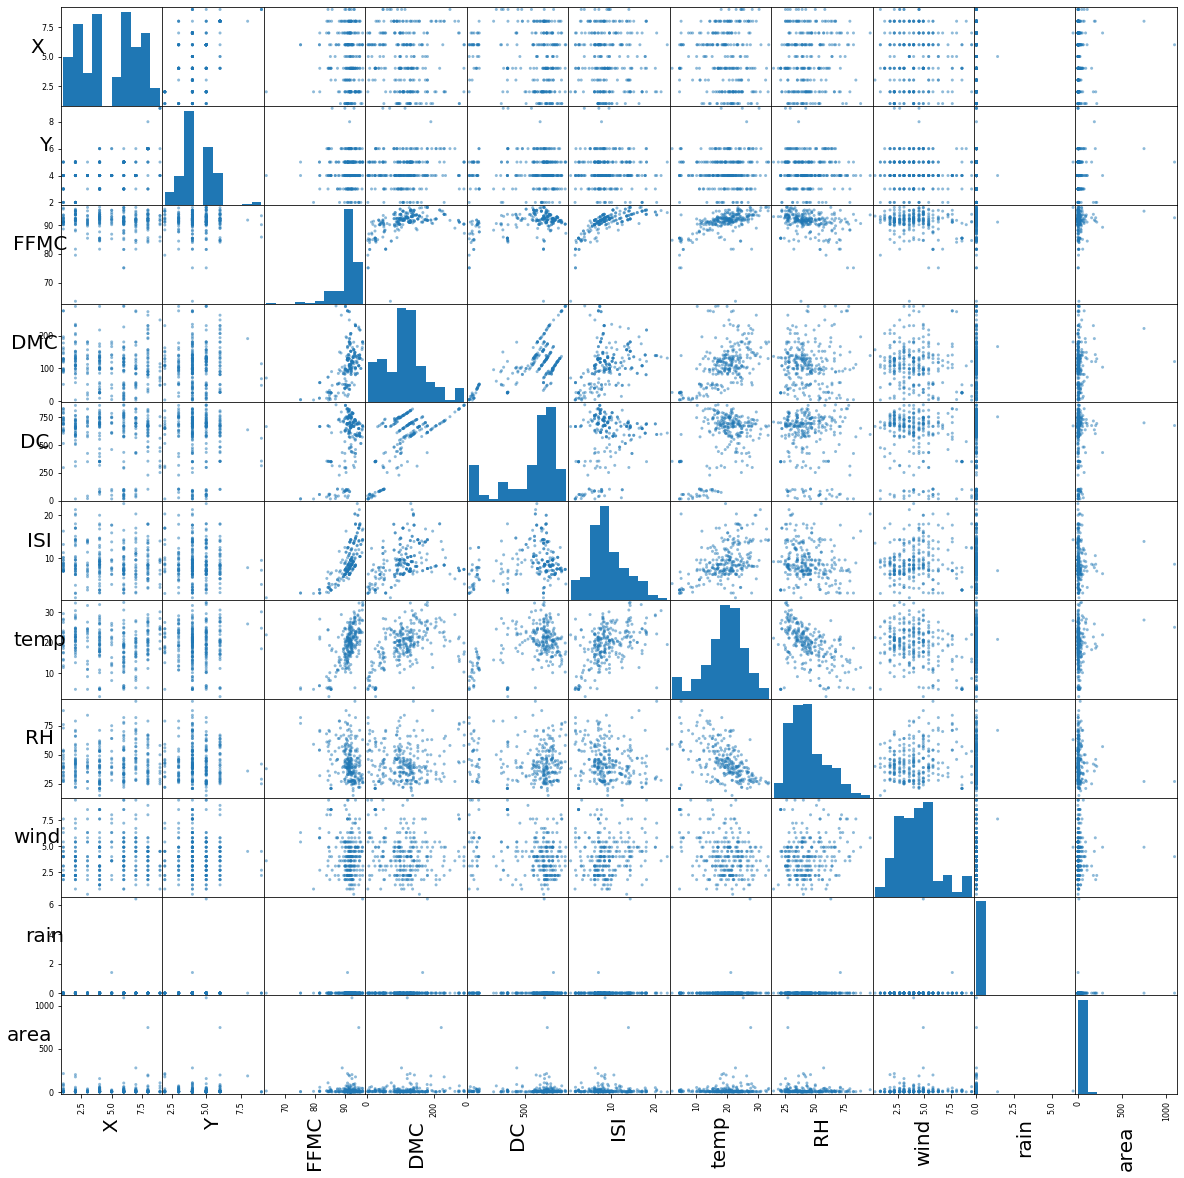

In [38]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('https://mysecondproject.s3.amazonaws.com/forestfires.csv') # Membuka data

month = data[data["month"] == 'sep']
month.plot.scatter(x = 'temp', y = 'RH')
plt.show()

month.plot.scatter(x = 'temp', y = 'wind')
plt.show()

month = data[data["month"] == 'sep']
month.plot.scatter(x = 'temp', y = 'rain')
plt.show()

month = data[data["month"] == 'sep']
month.plot.scatter(x = 'temp', y = 'ISI')
plt.show()

month = data[data["month"] == 'sep']
month.plot.scatter(x = 'temp', y = 'DC')
plt.show()

month = data[data["month"] == 'sep']
month.plot.scatter(x = 'temp', y = 'DMC')
plt.show()

month = data[data["month"] == 'sep']
month.plot.scatter(x = 'temp', y = 'FFMC')
plt.show()


from pandas.plotting import scatter_matrix
data_checking = data[data['area'] > 0]
plt = scatter_matrix(data_checking, figsize = [20, 20])
for ax in plt.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

Yang memungkinkan memiliki korelasi adalah fitur temperatur dan RH (relative humidity) karena pola sebaran datanya membentuk pola linier

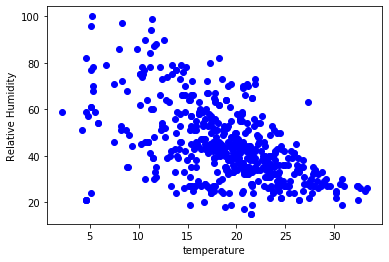

Coefficients:  [[-1.39314062]]
Intercept:  [70.24511562]


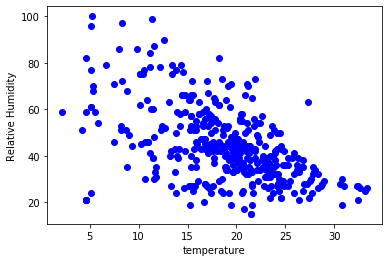

Mean absolute error: 10.91
Residual sum of squares (MSE): 202.86
R2-score: -2.31


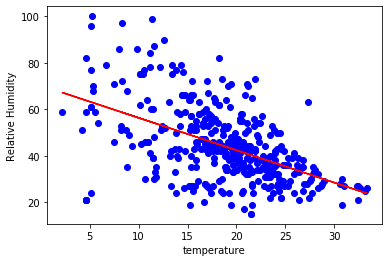

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.linear_model import LogisticRegression


cdf = data[['temp','RH']]
cdf.head()

plt.scatter(cdf.temp, cdf.RH,  color='blue')
plt.xlabel("temperature")
plt.ylabel("Relative Humidity")
plt.show()

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['temp']])
train_y = np.asanyarray(train[['RH']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.temp, train.RH,  color='blue')
plt.xlabel("temperature")
plt.ylabel("Relative Humidity")
plt.show()

plt.scatter(train.temp, train.RH,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("temperature")
plt.ylabel("Relative Humidity")

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['temp']])
test_y = np.asanyarray(test[['RH']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

### statistik deskriptif

In [4]:
# Mencari Nilai Mean
import numpy as np


np.min(cdf)

temp     2.2
RH      15.0
dtype: float64

In [71]:
# Mencari Nilai Max
np.max(cdf)

temp     33.3
RH      100.0
dtype: float64

In [73]:
# Mencari Nilai Median
np.median(cdf)

26.2

In [72]:
# Mencari Nilai Standar Deviasi
np.std(cdf)

temp     5.801007
RH      16.301681
dtype: float64

In [74]:
# Mencari Nilai Variance
np.var(cdf)

temp     33.651682
RH      265.744793
dtype: float64

In [75]:
# Mencari Nilai Quantil
np.percentile(cdf, 25)

19.1

In [81]:
# Mencari Nilai Covariance
dtemp = data['temp']
drh = data['RH']
np.cov(dtemp, drh)

array([[ 33.71689795, -49.96993425],
       [-49.96993425, 266.25980238]])

In [83]:
# Mencari Nilai Correlation
np.corrcoef(dtemp, drh)

array([[ 1.        , -0.52739034],
       [-0.52739034,  1.        ]])

### Analisis Model Regresi

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

x = np.array(data['temp']).reshape((-1,1)) # Variabel bebas yang diubah dari column menjadi baris
y = np.array(data['RH']) # Variabel terikat

print(x.shape)
print(y.shape)
model = LinearRegression()
model.fit(x,y)

intercept = model.intercept_ # Menghitung Intersepsi (b0)
slope = model.coef_[0] # Menghitung Slop (b1)
r_sq = model.score(x,y) # Menghitung hubungan variabel x dan y

print('Intercept: {:0.2f}'.format(intercept))
print('Slope: {:0.2f}'.format(slope))
print('R\u00b2: {:0.2f}'.format(r_sq))

(517, 1)
(517,)
Intercept: 72.28
Slope: -1.48
R²: 0.28


karena R2 hanya 0.28 maka data tersebut bukanlah regressi linear

In [19]:
cdf.head()

,temp,RH
0,8.2,51
1,18.0,33
2,14.6,33
3,8.3,97
4,11.4,99


## Mencari Model Regresi NonLinear

In [15]:
# Mendefinisikan beberapa fungsi
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

# Fungsi Linear
def lnr(x, Beta_0, Beta_1):
    y = Beta_0 + Beta_1*x
    return y
# Fungsi Sigmoid
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
# Fungsi Eksponenisal
def expo(x, Beta_1, Beta_2):
    y = Beta_1*np.exp(Beta_2*x)
    return y
# Fungsi Kuadrat
def Quadratic(x, Beta_1, Beta_2, Beta_3):
    y = Beta_1+Beta_2*x**1+Beta_3*x**2
    return y
# Fungsi Kubik
def Qubic(x, Beta_1, Beta_2, Beta_3, Beta_4):
    y = Beta_1+Beta_2*x**1+Beta_3*x**2+Beta_4*x**3
    return y




In [16]:
# Menormalisasi data
xdata =x/max(x)
ydata =y/max(y)

In [34]:
#data_checking = data[data['area'] > 0]
import numpy as np
np.random.seed(0)

msk = np.random.rand(len(data)) < 0.8
train_x = np.array(xdata[msk]).reshape(-1,1)
test_x = np.array(xdata[~msk]).reshape(-1,1)
train_y = np.array(ydata[msk]).reshape(-1,1)
test_y = np.array(ydata[~msk]).reshape(-1,1)

print(train_x.shape,train_y.shape)
#build the model
popt1, pcov = curve_fit(lnr, train_x.flatten(), train_y.flatten())
popt2, pcov = curve_fit(sigmoid, train_x.flatten(), train_y.flatten(), maxfev = 10000)
popt3, pcov = curve_fit(expo, train_x.flatten(), train_y.flatten(), maxfev = 10000)
popt4, pcov = curve_fit(Quadratic, train_x.flatten(), train_y.flatten(), maxfev = 10000)
popt5, pcov = curve_fit(Qubic, train_x.flatten(), train_y.flatten(), maxfev = 10000)

# predict using test set
y_hat1 = lnr(test_x, *popt1)
y_hat2 = sigmoid(test_x, *popt2)
y_hat3 = expo(test_x, *popt3)
y_hat4 = Quadratic(test_x, *popt4)
y_hat5 = Qubic(test_x, *popt5)

# evaluation
print("Sigmoid")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat1 , test_y) )
print("---------")
      
# evaluation
print("eksponensial")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat2 , test_y) )
print("---------")

# evaluation
print("Quadratic")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat3 , test_y) )
print("---------")

# evaluation
print("Qubic")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat4 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat4 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat4 , test_y) )
print("---------")


(417, 1) (417, 1)
Sigmoid
Mean absolute error: 0.12
Residual sum of squares (MSE): 0.03
R2-score: -2.15
---------
eksponensial
Mean absolute error: 0.14
Residual sum of squares (MSE): 0.03
R2-score: -1068112668963.58
---------
Quadratic
Mean absolute error: 0.12
Residual sum of squares (MSE): 0.03
R2-score: -2.28
---------
Qubic
Mean absolute error: 0.12
Residual sum of squares (MSE): 0.03
R2-score: -2.15
---------


Berdasarkan perhitungan, model terbaik bisa adalah Eksponensial karena memiliki angka terbesar dan paling mendekati 1

## Clustering

In [39]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv('https://mysecondproject.s3.amazonaws.com/forestfires.csv')
print(data.shape)
data.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


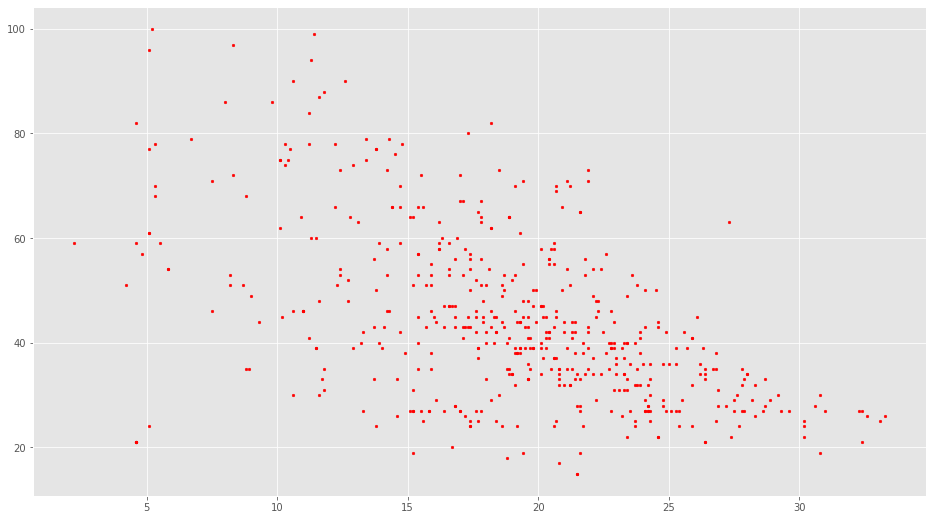

In [6]:
# Getting the values and plotting it
f1 = data['temp'].values
f2 = data['RH'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)

In [7]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[50.  4.]
 [20. 71.]
 [56. 43.]]


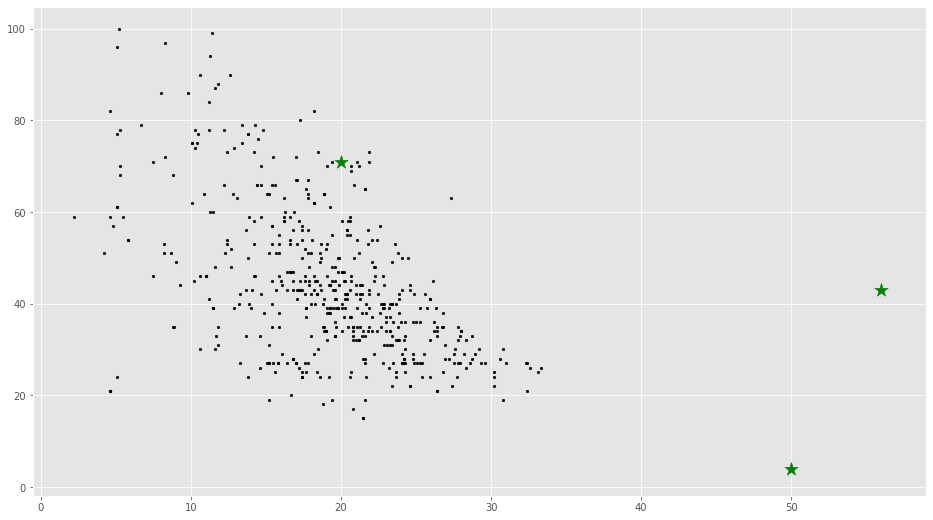

In [12]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [13]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [18]:
def plot_color(X):
    clust1_x = []
    clust1_y = []
    clust2_x = []
    clust2_y = []
    clust3_x = []
    clust3_y = []
    for i,val in enumerate(kmeans.labels_):
        if val == 0:
            clust1_x.append(X[i,0])
            clust1_y.append(X[i,1])
        if val == 1:
            clust2_x.append(X[i,0])
            clust2_y.append(X[i,1])
        if val == 2:
            clust3_x.append(X[i,0])
            clust3_y.append(X[i,1])

    plt.scatter(clust1_x,clust1_y, c='red', marker='o')
    plt.scatter(clust2_x,clust2_y, c='green', marker='o')
    plt.scatter(clust3_x,clust3_y, c='blue', marker='o')

In [41]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
    
# Specify the number of clusters (3) and fit the data X
score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cdf)
    scr = silhouette_score(cdf, kmeans.labels_)
    print('Jumlah Cluster {:d} nilai Shilhutte: {:0.3E}'.format(i,scr))
    score.append(scr)

print("\nScore terbaik adalah KMeans dengan jumlah kluster {:d}".format(np.argmax(score)+2))

Jumlah Cluster 2 nilai Shilhutte: 5.536E-01
Jumlah Cluster 3 nilai Shilhutte: 4.492E-01
Jumlah Cluster 4 nilai Shilhutte: 4.201E-01
Jumlah Cluster 5 nilai Shilhutte: 4.100E-01
Jumlah Cluster 6 nilai Shilhutte: 3.773E-01
Jumlah Cluster 7 nilai Shilhutte: 3.702E-01
Jumlah Cluster 8 nilai Shilhutte: 3.608E-01
Jumlah Cluster 9 nilai Shilhutte: 3.939E-01
Jumlah Cluster 10 nilai Shilhutte: 3.691E-01

Score terbaik adalah KMeans dengan jumlah kluster 2


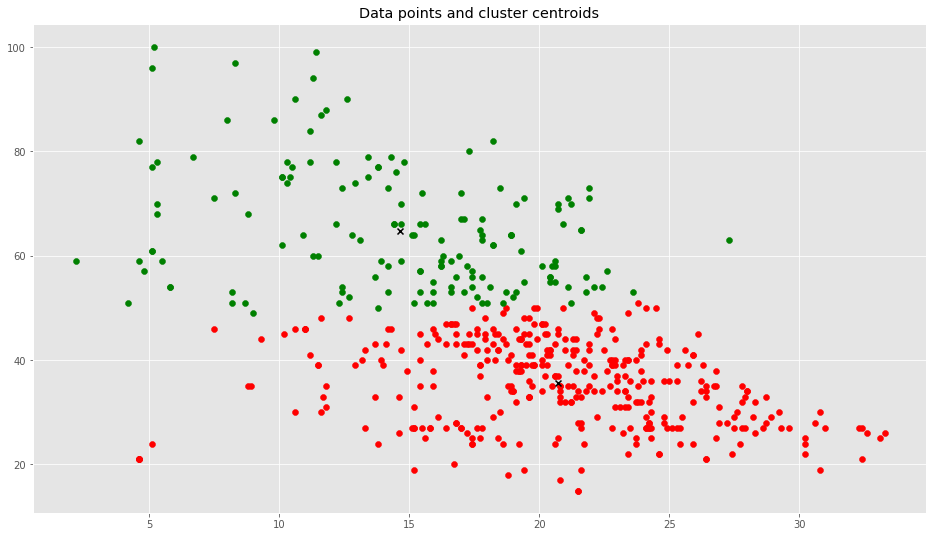

In [21]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=2, random_state=0).fit(cdf)
plot_color(cdf.values)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
plt.title('Data points and cluster centroids')
plt.show()